# Linear Support Vector Classifier

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC  # the same as SVC with a linear kernel, but optimized

In [3]:
# load dataset and get features and labels
iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]  # petal width and length
y = (iris['target'] == 2).astype(np.float64)  # iris virginica

In [4]:
# fit a pipeline that scales the features and classifies with linear SVC
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [5]:
# make a prediction
svm_clf.predict([[5.5, 1.7]])

array([1.])

# Non-Linear SVM Classification

In [6]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

In [7]:
# make moon data
X, y = make_moons(n_samples=100, noise=0.15)

In [8]:
# fit a pipeline that computes powers of the original features, scales, and classifies with linear SVM
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge'))
])
polynomial_svm_clf.fit(X, y)

/Users/sebastian/Documents/GitHub/study/study_env/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [9]:
# make function to plot margins and dataset
import matplotlib.pyplot as plt

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'g^')
    plt.axis(axes)
    plt.grid()
    plt.xlabel("X1")
    plt.xlabel("X2")

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

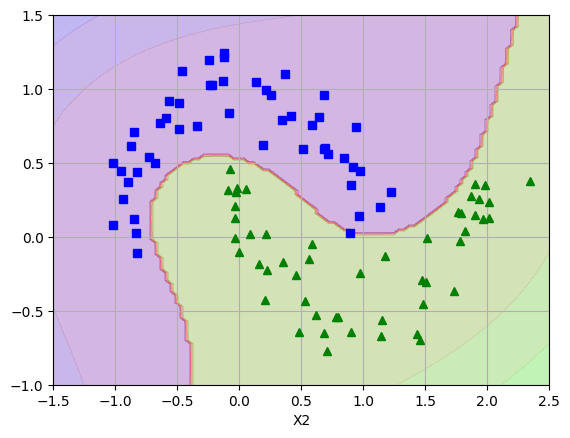

In [10]:
axes = [-1.5, 2.5, -1, 1.5]
plot_predictions(polynomial_svm_clf, axes)
plot_dataset(X, y, axes)

In [11]:
# fit an SVC with 3-degree polynomial kernel with low weight on high orders (i.e. low coef0)
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [12]:
# fit an SVC with 10-degree polynomial kernel with high weight on high orders (i.e. high coef0)
from sklearn.svm import SVC
poly100_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=10, coef0=100, C=5))
])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

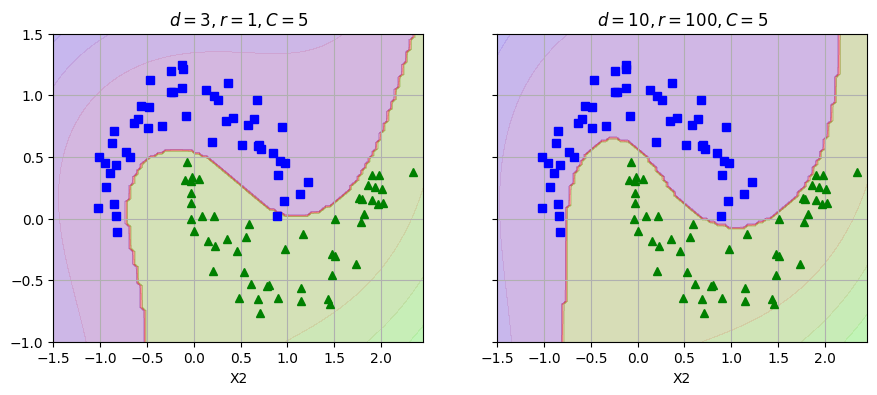

In [13]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey='row')
ax = [-1.5, 2.45, -1, 1.5]

plt.sca(axes[0])  # set current axes
plot_predictions(poly_kernel_svm_clf, axes=ax)
plot_dataset(X, y, ax)
plt.title(r"$d=3, r=1, C=5$")

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, axes=ax)
plot_dataset(X, y, ax)
plt.title(r"$d=10, r=100, C=5$")
plt.ylabel("")

plt.show()

In [14]:
# fit a Gaussian RBF classifier
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

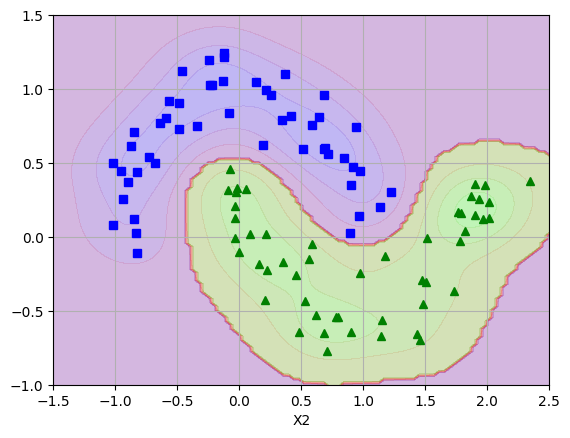

In [15]:
axes = [-1.5, 2.5, -1, 1.5]
plot_predictions(clf=rbf_kernel_svm_clf, axes=axes)
plot_dataset(X, y, axes)

# SVM Regression

In [16]:
# make linear data with noise
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [17]:
# fit a linear SVM regressor
from sklearn.svm import LinearSVR
svm_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_reg', LinearSVR(epsilon=0.5, random_state=42))
])
svm_reg.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_reg', LinearSVR(epsilon=0.5, random_state=42))])

In [18]:
# function to get the margin violations
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg['svm_reg'].epsilon)
    return np.argwhere(off_margin)

In [19]:
# store the support vectors in the model
svm_reg['svm_reg'].support_ = find_support_vectors(svm_reg, X, y)

In [95]:
# function to plot SVM regression
def plot_svm_regression(svm_reg, X, y, axes):
    svr = svm_reg['svm_reg']
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, 'k-', lw=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svr.epsilon, 'k--')
    plt.plot(x1s, y_pred - svr.epsilon, 'k--')
    plt.scatter(X[svr.support_], y[svr.support_], s=180, color='r', alpha=0.1)
    plt.plot(X, y, 'bo')
    plt.xlabel("X1")
    plt.legend(loc='upper left')
    plt.axis()


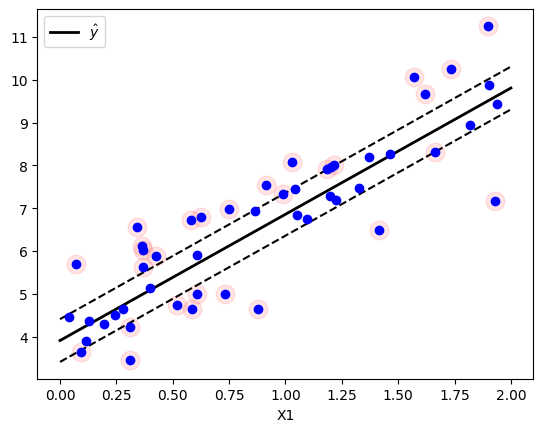

In [21]:
plot_svm_regression(svm_reg, X, y, [0, 2, 3, 11])

In [29]:
svm_reg_small_regularization = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_reg', LinearSVR(epsilon=1.5, random_state=42))
    ])
svm_reg_small_regularization.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_reg', LinearSVR(epsilon=1.5, random_state=42))])

In [30]:
# store the support vectors in the model
svm_reg_small_regularization['svm_reg'].support_ = find_support_vectors(svm_reg, X, y)

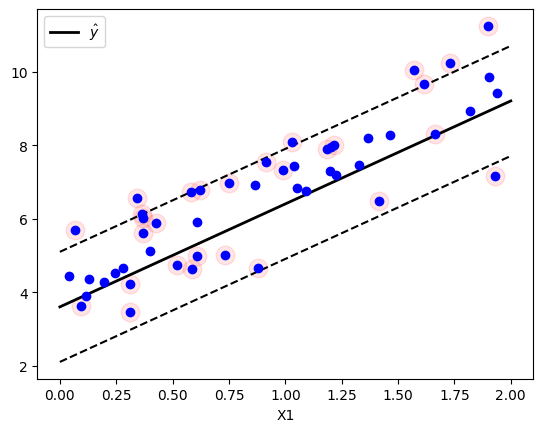

In [31]:
plot_svm_regression(svm_reg_small_regularization, X, y, [0, 2, 3, 11])

## Polynomial Kernel

In [42]:
# fake parabolic data
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X ** 2 + np.random.randn(m, 1) / 10).ravel()

In [43]:
from sklearn.svm import SVR

In [91]:
# Make SVM regressor with a polynomial kernel. Remember that the kernel trick does not include cross terms
svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=0.1, gamma='scale')
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

In [92]:
svm_poly_reg.predict(np.array([[0.3], [0.2]]))

array([0.21915066, 0.19053525])

In [97]:
def plot_svm_regression(svr, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svr.predict(x1s)
    plt.plot(x1s, y_pred, 'k-', lw=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svr.epsilon, 'k--')
    plt.plot(x1s, y_pred - svr.epsilon, 'k--')
    plt.scatter(X[svr.support_], y[svr.support_], s=180, color='r', alpha=0.1)
    plt.plot(X, y, 'bo')
    plt.xlabel("X1")
    plt.legend(loc='upper left')
    plt.axis()

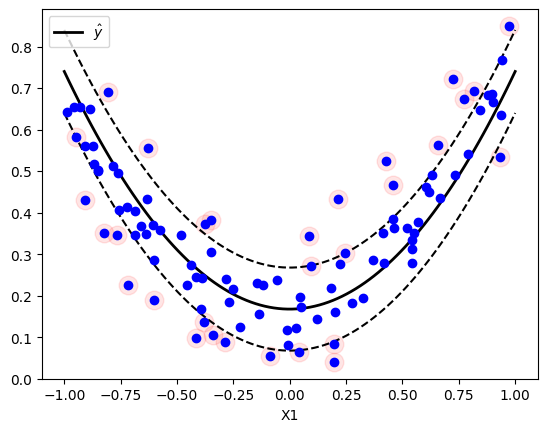

In [98]:
plot_svm_regression(svr=svm_poly_reg, X=X, y=y, axes=[-1, 1, 0, 1])